In [57]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as sps
import matplotlib.pyplot as plt

In [58]:
ticker = '^GSPC'
start = '2018-12-31'
end = '2023-6-15'
data = yf.download(ticker, start, end)['Adj Close']
returns = data.pct_change()[1:]
max_t = 64
var0 = returns.var()
n = len(returns)

[*********************100%***********************]  1 of 1 completed


In [59]:
variance_ratio_output = pd.DataFrame()
for t in np.arange(2, max_t+1):
    variance = returns.rolling(t).sum().var()
    variance_ratio = variance/(t*var0) - 1 #see if random walk
    standard_error = (2*(2*t-1)*(t-1)/(3*t*n))**(1/2)
    z_stat = variance_ratio/standard_error
    p_value = 2*(1-sps.norm.cdf(abs(z_stat)))
    variance_ratio_output[t] = [var0, variance, variance_ratio, z_stat, p_value]

In [60]:
min_p_value = min(variance_ratio_output.iloc[4])
chow_denning = 1 - (1 - min_p_value)**(max_t - 1)
max_z_stat = variance_ratio_output.iloc[3][variance_ratio_output.iloc[4] == min_p_value].values[0]

market is mean-reverting (antipersistent)


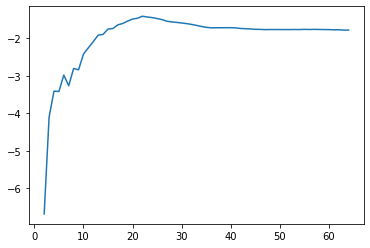

In [61]:
if chow_denning > 0.1:
    print('market is efficient')
elif max_z_stat > 0:
    print('market is trending (persistent)')
else:
    print('market is mean-reverting (antipersistent)')

plt.plot(variance_ratio_output.iloc[3])